## Purpose:
This notebook applies the best algorithm + best k-value (determined from clustering_full) to every single trial in the dataset.
## What is being done:
- From the sample-based analysis, select the best clustering choices:
Raw → KMeans 
PCA → KMeans 
Chunked raw → Agglomerative 
Chunked PCA → Agglomerative
- For each representation, run the chosen clustering algorithm on all trials.
- extract and save:
Davies–Bouldin
Silhouette
WCSS
Cluster-size distributions
- These results are saved as CSV files so the heavy computation doesn’t need to be repeated.

## Why:
Now that approach that works best is known, a full-scale within-trial clustering is perfomred across the entire dataset.
This provides trial-by-trial neural structure profiles that can later be compared to Ari’s reconstructed signals.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import h5py

import clustering_util_full as cu

data_root = Path("Final Project/brain-to-text-25/t15_copyTask_neuralData/hdf5_data_final")
csv_path = Path("trial_index.csv")

if csv_path.exists():
    df_trials = pd.read_csv(csv_path)
else:
    # rebuild index if needed
    trial_list = []
    for session_dir in sorted(data_root.glob("t15.*")):
        for split in ["train", "val", "test"]:
            h5_path = session_dir / f"data_{split}.hdf5"
            if not h5_path.exists():
                continue
            with h5py.File(h5_path, "r") as h5:
                for trial_key in h5.keys():
                    if trial_key.startswith("trial_"):
                        trial_list.append({
                            "session": session_dir.name,
                            "split": split,
                            "trial": trial_key,
                            "path": str(h5_path),
                        })
    df_trials = pd.DataFrame(trial_list)
    df_trials.to_csv(csv_path, index=False)

len(df_trials), df_trials.head()


(10948,
           session  split       trial  \
 0  t15.2023.08.11  train  trial_0000   
 1  t15.2023.08.11  train  trial_0001   
 2  t15.2023.08.11  train  trial_0002   
 3  t15.2023.08.11  train  trial_0003   
 4  t15.2023.08.11  train  trial_0004   
 
                                                 path  
 0  ..\data\hdf5_data_final\t15.2023.08.11\data_tr...  
 1  ..\data\hdf5_data_final\t15.2023.08.11\data_tr...  
 2  ..\data\hdf5_data_final\t15.2023.08.11\data_tr...  
 3  ..\data\hdf5_data_final\t15.2023.08.11\data_tr...  
 4  ..\data\hdf5_data_final\t15.2023.08.11\data_tr...  )

In [2]:
# selected from clustering_full sample trails
BEST_K_RAW = 6         
BEST_K_PCA = 6         
BEST_K_CHUNK_RAW = 7
BEST_K_CHUNK_PCA = 6


PCA_DIM = 30
WINDOW_SIZE = 10
OVERLAP = 0


In [ ]:
df_db_raw_all, df_sil_raw_all, df_wcss_raw_all, df_sizes_raw_all = cu.evaluate_raw(
    df_trials,
    k_values=[BEST_K_RAW],      # <--- singleton list
    algorithms=["kmeans"],     # best for raw
    n_reps=None,               # not needed for kmeans
    shrink=None,
    max_trials=None            # None = ALL trials
)

df_db_raw_all.to_csv("metrics_raw_kmeans_db.csv", index=False)
df_sil_raw_all.to_csv("metrics_raw_kmeans_sil.csv", index=False)
df_wcss_raw_all.to_csv("metrics_raw_kmeans_wcss.csv", index=False)
df_sizes_raw_all.to_csv("metrics_raw_kmeans_sizes.csv", index=False)

df_db_raw_all.head()


In [7]:
df_db_pca_all, df_sil_pca_all, df_wcss_pca_all, df_sizes_pca_all = cu.evaluate_pca(
    df_trials,
    k_values=[BEST_K_PCA],      # <--- singleton list
    algorithms=["kmeans"],   # best for PCA
    pca_dim=PCA_DIM,
    n_reps=None,
    shrink=None,
    max_trials=None
)

df_db_pca_all.to_csv("metrics_pca_kmeans_db.csv", index=False)
df_sil_pca_all.to_csv("metrics_pca_kmeans_sil.csv", index=False)
df_wcss_pca_all.to_csv("metrics_pca_kmeans_wcss.csv", index=False)
df_sizes_pca_all.to_csv("metrics_pca_kmeans_sizes.csv", index=False)

df_db_pca_all.head()


,trial,algorithm,k,db
0,trial_0000,kmeans,6,2.969540
1,trial_0001,kmeans,6,3.019423
2,trial_0002,kmeans,6,3.086500
3,trial_0003,kmeans,6,3.092666
4,trial_0004,kmeans,6,3.047258


In [5]:
df_db_chunk_raw_all, df_sil_chunk_raw_all, df_wcss_chunk_raw_all, df_sizes_chunk_raw_all = cu.evaluate_chunked_raw(
    df_trials,
    k_values=[BEST_K_CHUNK_RAW],      # <--- singleton list
    algorithms=["agglomerative"],   # best for chunked raw
    window_size=WINDOW_SIZE,
    overlap=OVERLAP,
    pca_dim=None,                   # raw, not PCA
    n_reps=None,
    shrink=None,
    max_trials=None
)

df_db_chunk_raw_all.to_csv("metrics_chunk_raw_agg_db.csv", index=False)
df_sil_chunk_raw_all.to_csv("metrics_chunk_raw_agg_sil.csv", index=False)
df_wcss_chunk_raw_all.to_csv("metrics_chunk_raw_agg_wcss.csv", index=False)
df_sizes_chunk_raw_all.to_csv("metrics_chunk_raw_agg_sizes.csv", index=False)

df_db_chunk_raw_all.head()


,trial,algorithm,k,db
0,trial_0000,agglomerative,7,1.897461
1,trial_0001,agglomerative,7,1.883201
2,trial_0002,agglomerative,7,1.848546
3,trial_0003,agglomerative,7,1.705630
4,trial_0004,agglomerative,7,1.684212


In [8]:
df_db_chunk_pca_all, df_sil_chunk_pca_all, df_wcss_chunk_pca_all, df_sizes_chunk_pca_all = cu.evaluate_chunked_pca(
    df_trials,
    k_values=[BEST_K_CHUNK_PCA],      # <--- singleton list
    algorithms=["agglomerative"],   # best for chunked PCA
    window_size=WINDOW_SIZE,
    pca_dim=PCA_DIM,
    overlap=OVERLAP,
    n_reps=None,
    shrink=None,
    max_trials=None
)

df_db_chunk_pca_all.to_csv("metrics_chunk_pca_agg_db.csv", index=False)
df_sil_chunk_pca_all.to_csv("metrics_chunk_pca_agg_sil.csv", index=False)
df_wcss_chunk_pca_all.to_csv("metrics_chunk_pca_agg_wcss.csv", index=False)
df_sizes_chunk_pca_all.to_csv("metrics_chunk_pca_agg_sizes.csv", index=False)

df_db_chunk_pca_all.head()


,trial,algorithm,k,db
0,trial_0000,agglomerative,6,1.749766
1,trial_0001,agglomerative,6,1.655804
2,trial_0002,agglomerative,6,1.884799
3,trial_0003,agglomerative,6,1.723160
4,trial_0004,agglomerative,6,1.539072


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


db_raw   = df_db_raw_all.copy()
db_pca   = df_db_pca_all.copy()
db_craw  = df_db_chunk_raw_all.copy()
db_cpca  = df_db_chunk_pca_all.copy()

db_raw["rep"]  = "raw"
db_pca["rep"]  = "pca"
db_craw["rep"] = "chunk_raw"
db_cpca["rep"] = "chunk_pca"

df_db_all = pd.concat([db_raw, db_pca, db_craw, db_cpca], ignore_index=True)

sil_raw   = df_sil_raw_all.copy()
sil_pca   = df_sil_pca_all.copy()
sil_craw  = df_sil_chunk_raw_all.copy()
sil_cpca  = df_sil_chunk_pca_all.copy()

sil_raw["rep"]  = "raw"
sil_pca["rep"]  = "pca"
sil_craw["rep"] = "chunk_raw"
sil_cpca["rep"] = "chunk_pca"

df_sil_all = pd.concat([sil_raw, sil_pca, sil_craw, sil_cpca], ignore_index=True)

wcss_raw   = df_wcss_raw_all.copy()
wcss_pca   = df_wcss_pca_all.copy()
wcss_craw  = df_wcss_chunk_raw_all.copy()
wcss_cpca  = df_wcss_chunk_pca_all.copy()

wcss_raw["rep"]  = "raw"
wcss_pca["rep"]  = "pca"
wcss_craw["rep"] = "chunk_raw"
wcss_cpca["rep"] = "chunk_pca"

df_wcss_all = pd.concat([wcss_raw, wcss_pca, wcss_craw, wcss_cpca], ignore_index=True)

df_db_all.head(), df_sil_all.head(), df_wcss_all.head()


(        trial algorithm  k        db  rep
 0  trial_0000    kmeans  6  4.761162  raw
 1  trial_0001    kmeans  6  4.772968  raw
 2  trial_0002    kmeans  6  5.158298  raw
 3  trial_0003    kmeans  6  4.846407  raw
 4  trial_0004    kmeans  6  4.761223  raw,
         trial algorithm  k       sil  rep
 0  trial_0000    kmeans  6  0.032421  raw
 1  trial_0001    kmeans  6  0.023312  raw
 2  trial_0002    kmeans  6  0.017567  raw
 3  trial_0003    kmeans  6  0.024751  raw
 4  trial_0004    kmeans  6  0.021189  raw,
         trial algorithm  k         wcss  rep
 0  trial_0000    kmeans  6  4920.593750  raw
 1  trial_0001    kmeans  6  4836.209961  raw
 2  trial_0002    kmeans  6  4878.420410  raw
 3  trial_0003    kmeans  6  4755.512207  raw
 4  trial_0004    kmeans  6  4603.299316  raw)

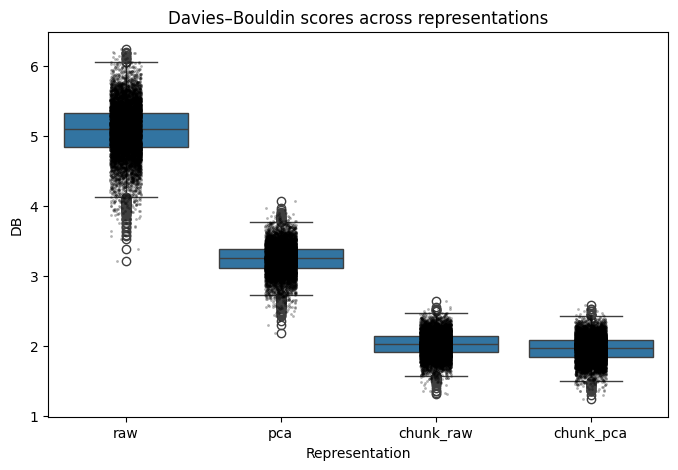

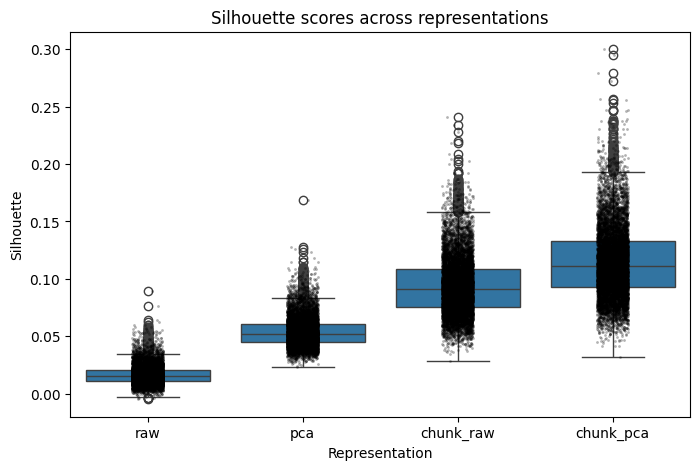

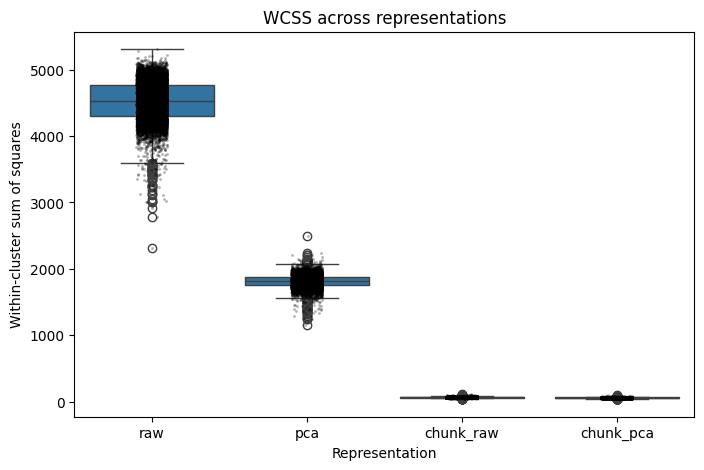

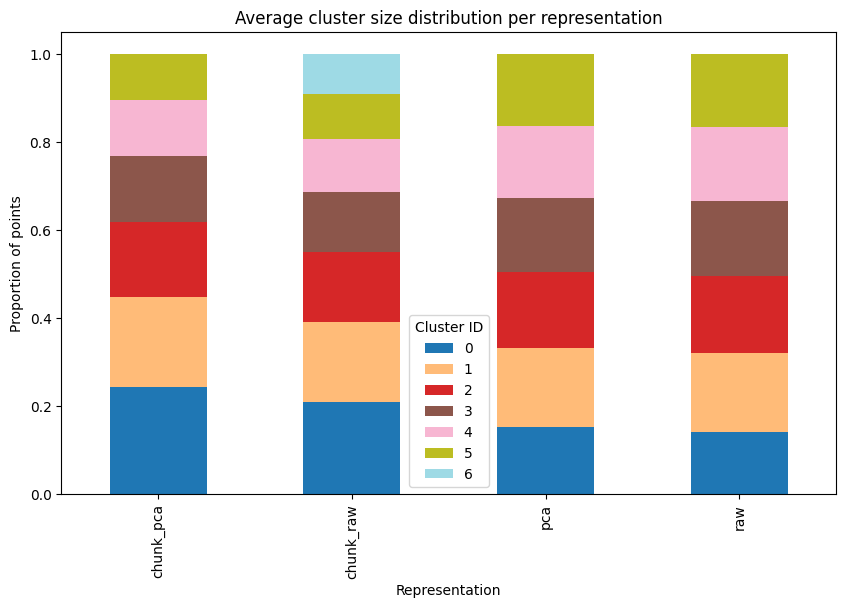

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_db_all, x="rep", y="db")
sns.stripplot(data=df_db_all, x="rep", y="db", color="black", alpha=0.3, size=2)
plt.title("Davies–Bouldin scores across representations")
plt.ylabel("DB")
plt.xlabel("Representation")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df_sil_all, x="rep", y="sil")
sns.stripplot(data=df_sil_all, x="rep", y="sil", color="black", alpha=0.3, size=2)
plt.title("Silhouette scores across representations")
plt.ylabel("Silhouette")
plt.xlabel("Representation")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df_wcss_all, x="rep", y="wcss")
sns.stripplot(data=df_wcss_all, x="rep", y="wcss", color="black", alpha=0.3, size=2)
plt.title("WCSS across representations")
plt.ylabel("Within-cluster sum of squares")
plt.xlabel("Representation")
plt.show()

sizes_raw   = df_sizes_raw_all.copy().fillna(0)
sizes_pca   = df_sizes_pca_all.copy().fillna(0)
sizes_craw  = df_sizes_chunk_raw_all.copy().fillna(0)
sizes_cpca  = df_sizes_chunk_pca_all.copy().fillna(0)

sizes_raw["rep"]  = "raw"
sizes_pca["rep"]  = "pca"
sizes_craw["rep"] = "chunk_raw"
sizes_cpca["rep"] = "chunk_pca"

df_sizes_all = pd.concat([sizes_raw, sizes_pca, sizes_craw, sizes_cpca], ignore_index=True)

# get only the cluster columns (exclude metadata cols)
meta_cols = ["trial", "algorithm", "k", "rep"]
cluster_cols = [c for c in df_sizes_all.columns if c not in meta_cols]

# mean cluster size per rep (averaged over trials)
sizes_mean = df_sizes_all.groupby("rep")[cluster_cols].mean()

# convert to proportions
sizes_mean_pct = sizes_mean.div(sizes_mean.sum(axis=1), axis=0)

sizes_mean_pct

sizes_mean_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    colormap="tab20"
)
plt.title("Average cluster size distribution per representation")
plt.ylabel("Proportion of points")
plt.xlabel("Representation")
plt.legend(title="Cluster ID")
plt.show()





In [12]:
import pickle

BEST_K_CHUNK_RAW = 7   # <-- replace with the k you chose from your diagnostic plots

WINDOW_SIZE = 10
OVERLAP = 0

per_trial_clusters_chunk_raw = {}

for _, row in df_trials.iterrows():
    trial_id = row["trial"]

    with h5py.File(row["path"], "r") as h5:
        features = h5[trial_id]["input_features"][:]

    # preprocess + chunk
    _, X_raw = cu.preprocess_trial_features(features)
    X_chunks, bounds = cu.chunk_time_series(X_raw, window_size=WINDOW_SIZE, overlap=OVERLAP)

    # best algorithm for chunked raw: agglomerative
    labels, X_used = cu.run_agglomerative(X_chunks, n_clusters=BEST_K_CHUNK_RAW)

    # build cluster -> [descriptors] for THIS trial
    trial_mapping = {}
    for c in np.unique(labels):
        idx = np.where(labels == c)[0]
        desc_list = []
        for j in idx:
            start_bin, end_bin = bounds[j]
            desc = (
                f"{row['split']}/"
                f"{row['session']}/"
                f"{trial_id}_chunk{j}_bins{start_bin}-{end_bin}"
            )
            desc_list.append(desc)
        trial_mapping[int(c)] = desc_list

    per_trial_clusters_chunk_raw[trial_id] = trial_mapping

# peek at one example
example_trial = list(per_trial_clusters_chunk_raw.keys())[0]
print("Example trial:", example_trial)
print(per_trial_clusters_chunk_raw[example_trial])

# save mapping
with open("per_trial_clusters_chunk_raw.pkl", "wb") as f:
    pickle.dump(per_trial_clusters_chunk_raw, f)

print("\nSaved per-trial chunked RAW clusters to per_trial_clusters_chunk_raw.pkl")


Example trial: trial_0000
{0: ['test/t15.2025.04.13/trial_0000_chunk1_bins10-20', 'test/t15.2025.04.13/trial_0000_chunk2_bins20-30', 'test/t15.2025.04.13/trial_0000_chunk7_bins70-80', 'test/t15.2025.04.13/trial_0000_chunk8_bins80-90', 'test/t15.2025.04.13/trial_0000_chunk9_bins90-100', 'test/t15.2025.04.13/trial_0000_chunk11_bins110-120', 'test/t15.2025.04.13/trial_0000_chunk12_bins120-130', 'test/t15.2025.04.13/trial_0000_chunk13_bins130-140', 'test/t15.2025.04.13/trial_0000_chunk17_bins170-180', 'test/t15.2025.04.13/trial_0000_chunk28_bins280-290', 'test/t15.2025.04.13/trial_0000_chunk29_bins290-300', 'test/t15.2025.04.13/trial_0000_chunk31_bins310-320', 'test/t15.2025.04.13/trial_0000_chunk32_bins320-330'], 1: ['test/t15.2025.04.13/trial_0000_chunk21_bins210-220', 'test/t15.2025.04.13/trial_0000_chunk22_bins220-230', 'test/t15.2025.04.13/trial_0000_chunk23_bins230-240', 'test/t15.2025.04.13/trial_0000_chunk24_bins240-250', 'test/t15.2025.04.13/trial_0000_chunk25_bins250-260', 'test/